In [60]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [61]:
df=pd.read_csv("sales_data_sample.csv", header=0,delimiter=',',encoding='utf-8')

In [13]:
df[['QUANTITYORDERED','SALES']].corr()

,QUANTITYORDERED,SALES
QUANTITYORDERED,1.000000,0.551426
SALES,0.551426,1.000000


In [20]:
max_order_lines = df['ORDERLINENUMBER'].max()
max_order_lines 

18

<Figure size 1000x600 with 0 Axes>

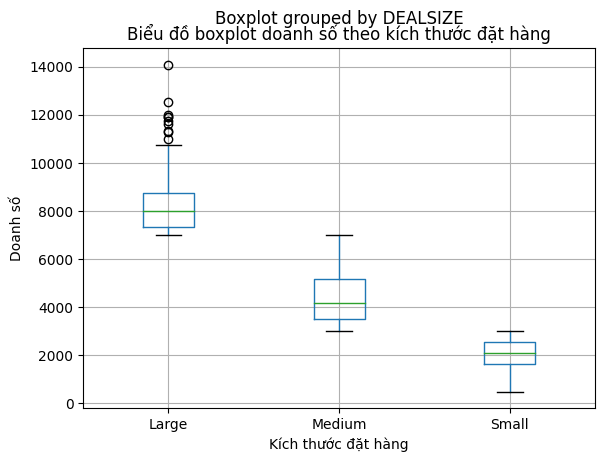

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Tạo biểu đồ boxplot về doanh số trên từng nhóm kích thước đặt hàng
plt.figure(figsize=(10, 6))
df.boxplot(column='SALES', by='DEALSIZE')
plt.xlabel('Kích thước đặt hàng')
plt.ylabel('Doanh số')
plt.title('Biểu đồ boxplot doanh số theo kích thước đặt hàng')
plt.show()

In [28]:
import pandas as pd

# Tính độ lệch chuẩn của giá trị đặt hàng
std_dev = df['ORDERLINENUMBER'].std()

print('Độ lệch chuẩn của giá trị đặt hàng:', std_dev)

Độ lệch chuẩn của giá trị đặt hàng: 4.225840964690944


In [30]:
import pandas as pd

# Lấy kích thước của dữ liệu
data_shape = df.shape

# Trích xuất số lượng hàng và số lượng cột từ tuple
data_shape

(2823, 8)

In [31]:
import pandas as pd
import numpy as np

# Áp dụng hàm biến đổi đầu tiên
transformed_sales_1 = 1 / (np.log(df['SALES']) ** 2 + 1)
import pandas as pd
import numpy as np

# Áp dụng hàm biến đổi đầu tiên
transformed_sales_2 = np.sqrt(transformed_sales_1)
deviation = df['SALES'] - transformed_sales_2
deviation

0       2870.875389
1       2765.774812
2       3884.219880
3       3746.579361
4       5205.153932
           ...     
2818    2244.271477
2819    3978.390222
2820    5417.454465
2821    2116.030506
2822    3079.316459
Name: SALES, Length: 2823, dtype: float64

In [33]:
import pandas as pd

# Tính số lượng sản phẩm theo kích thước đặt hàng
product_counts = df['DEALSIZE'].value_counts()

# Tính phần trăm số lượng sản phẩm theo kích thước đặt hàng
percentage = product_counts / product_counts.sum() * 100

print('Phần trăm số lượng sản phẩm theo kích thước đặt hàng:')
print(percentage)

Phần trăm số lượng sản phẩm theo kích thước đặt hàng:
DEALSIZE
Medium    49.025859
Small     45.412682
Large      5.561459
Name: count, dtype: float64


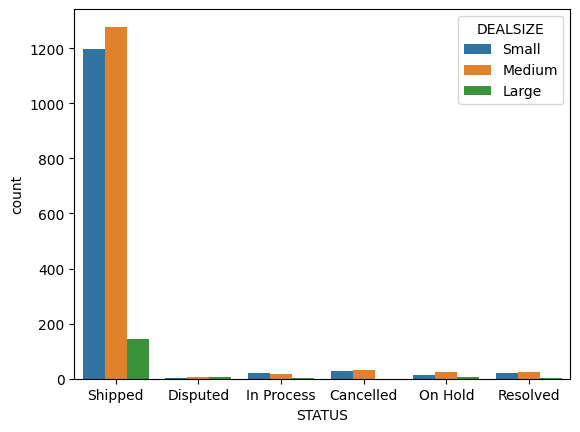

In [39]:
sns.countplot(x='STATUS',hue='DEALSIZE',data=df)
plt.show()

c:\Users\teoqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


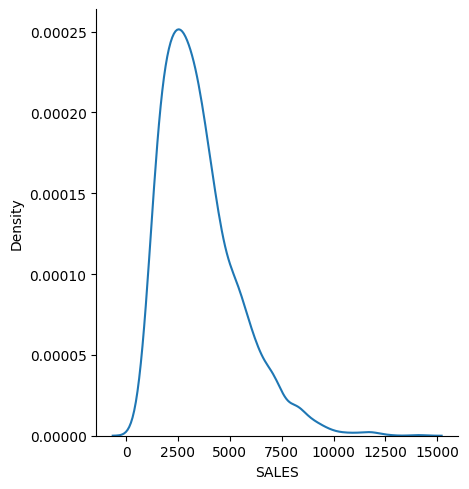

In [41]:
sns.displot(df,x='SALES',kind='kde')
plt.show()

In [43]:
one_hot_encoded = pd.get_dummies(df['DEALSIZE'])
one_hot_encoded

,Large,Medium,Small
0,False,False,True
1,False,False,True
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
2818,False,False,True
2819,False,True,False
2820,False,True,False
2821,False,False,True


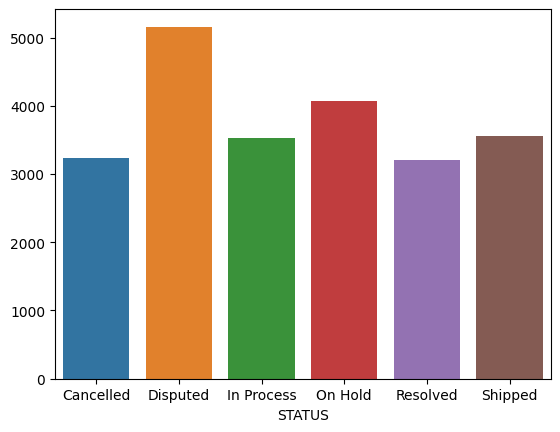

In [52]:
 # Thay 'du_lieu.csv' bằng tên tệp CSV của bạn

# Tính trung bình doanh số cho mỗi trạng thái giao hàng
average_sales_by_status = df.groupby('STATUS')['SALES'].mean()

# Vẽ biểu đồ cột
sns.barplot(x=average_sales_by_status.index,y=average_sales_by_status.values, data=df, errorbar = None)
plt.show()

# Đặt tiêu đề và nhãn cho các trục


In [77]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler


# Khởi tạo Max Absolute Scaler và áp dụng cho cột "SALES_ZSCORE"
maxabs_scaler =  MaxAbsScaler()
df['a'] = maxabs_scaler.fit_transform(df[['SALES']])

# Hiển thị dữ liệu sau khi áp dụng Scalers

value=df['a'].iloc[100]
value


0.21232496378561083

In [79]:
df[['STATUS','DEALSIZE']].0.25

<bound method DataFrame.corr of         STATUS DEALSIZE
0      Shipped    Small
1      Shipped    Small
2      Shipped   Medium
3      Shipped   Medium
4      Shipped   Medium
...        ...      ...
2818   Shipped    Small
2819   Shipped   Medium
2820  Resolved   Medium
2821   Shipped    Small
2822   On Hold   Medium

[2823 rows x 2 columns]>

In [87]:
(1000-df['SALES'].mean())/df['SALES'].std()

-1.3865776945065673

In [85]:
unique_countries = df['COUNTRY'].unique()

# Đếm số quốc gia đặt hàng
num_countries = len(unique_countries)

# Hiển thị số quốc gia đặt hàng
print(num_countries)

19


In [57]:
import pandas as pd
import numpy as np

# Đọc dữ liệu từ tệp CSV hoặc nguồn dữ liệu khác
  # Thay 'du_lieu.csv' bằng tên tệp CSV của bạn

# Chuyển đổi cột "SALES" lần lượt bằng hàm log, sqrt, square và cube root
df['SALES_LOG'] = np.log(df['SALES'])
df['SALES_SQRT'] = np.sqrt(df['SALES'])
df['SALES_SQUARE'] = np.square(df['SALES'])
df['SALES_CUBEROOT'] = np.cbrt(df['SALES'])

# Sắp xếp giảm dần theo mức độ lệch của cột "SALES" sau khi chuyển đổi
sorted_df = df.sort_values(by=['SALES_LOG', 'SALES_SQRT', 'SALES_SQUARE', 'SALES_CUBEROOT'], ascending=False)

# Hiển thị DataFrame đã sắp xếp
print(sorted_df[['SALES', 'SALES_LOG', 'SALES_SQRT', 'SALES_SQUARE', 'SALES_CUBEROOT']])

         SALES  SALES_LOG  SALES_SQRT  SALES_SQUARE  SALES_CUBEROOT
598   14082.80   9.552709  118.670974  1.983253e+08       24.148844
744   12536.50   9.436400  111.966513  1.571638e+08       23.230511
53    12001.00   9.392745  109.549076  1.440240e+08       22.894921
1062  11887.80   9.383268  109.031188  1.413198e+08       22.822707
104   11886.60   9.383167  109.025685  1.412913e+08       22.821939
...        ...        ...         ...           ...             ...
1818    640.05   6.461546   25.299209  4.096640e+05        8.617963
1551    577.60   6.358882   24.033310  3.336218e+05        8.328032
2044    553.95   6.317074   23.536142  3.068606e+05        8.212780
1287    541.14   6.293678   23.262416  2.928325e+05        8.148979
2249    482.13   6.178214   21.957459  2.324493e+05        7.841300

[2823 rows x 5 columns]
